# SuperTrend Trading Strategy - Exploratory Data Analysis (EDA)

**Author:** Trading System Analysis Team  
**Date:** June 26, 2025  
**Capstone Module:** Initial Report and Exploratory Data Analysis  

## Research Question
Can we develop a profitable trading strategy using the SuperTrend indicator with advanced risk management and choppiness filters to avoid unfavorable market conditions?

## Dataset Overview
This analysis uses historical price data for SOXL (3x Leveraged ETF) with 10-minute timeframes, including OHLCV data and calculated SuperTrend indicators.

## 1. Data Loading and Initial Exploration

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import os
from google.colab import files

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [3]:
# Uncomment to load data csv file and get file name and path
uploaded = files.upload()
# Get the uploaded filename dynamically
filename = list(uploaded.keys())[0]
# print(f"Uploaded file: {filename}")

Saving cache_SOXL_10Min.csv to cache_SOXL_10Min.csv


In [7]:
cache_file = pd.read_csv('/content/cache_SOXL_10Min.csv')
cache_file


,timestamp,open,high,low,close,volume,symbol
0,2020-06-02 10:50:00+00:00,155.2500,156.0000,155.25,155.4500,1215.0,SOXL
1,2020-06-02 11:00:00+00:00,155.2000,155.2000,155.20,155.2000,100.0,SOXL
2,2020-06-02 11:10:00+00:00,155.0000,155.0000,154.60,154.6000,1400.0,SOXL
3,2020-06-02 11:20:00+00:00,154.2500,154.2500,154.25,154.2500,300.0,SOXL
4,2020-06-02 11:30:00+00:00,154.5500,154.5500,154.55,154.5500,100.0,SOXL
...,...,...,...,...,...,...,...
104622,2025-06-26 15:40:00+00:00,25.0550,25.1600,25.05,25.0950,1363955.0,SOXL
104623,2025-06-26 15:50:00+00:00,25.0900,25.2400,25.09,25.2250,1702691.0,SOXL
104624,2025-06-26 16:00:00+00:00,25.2201,25.2300,25.15,25.1669,1484150.0,SOXL
104625,2025-06-26 16:10:00+00:00,25.1600,25.1799,25.11,25.1600,1008876.0,SOXL


In [10]:
# Load the dataset from cache
cache_file = '/content/cache_SOXL_10Min.csv'

if os.path.exists(cache_file):
    df = pd.read_csv(cache_file)
    print(f"✅ Loaded {len(df)} rows from {cache_file}")
else:
    print(f"❌ Cache file not found: {cache_file}")
    print("Please ensure the cache file exists before running this analysis.")
    df = pd.DataFrame()

# Display basic information about the dataset
print("\n📊 Dataset Information:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"Date range: {df['timestamp'].min()} to {df['timestamp'].max()}")

✅ Loaded 104627 rows from /content/cache_SOXL_10Min.csv

📊 Dataset Information:
Shape: (104627, 7)
Columns: ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'symbol']
Date range: 2020-06-02 10:50:00+00:00 to 2025-06-26 16:20:00+00:00


In [11]:
# Initial data exploration
print("📋 Dataset Overview:")
df.info()

print("\n📊 Statistical Summary:")
df.describe()

📋 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104627 entries, 0 to 104626
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  104627 non-null  object 
 1   open       104627 non-null  float64
 2   high       104627 non-null  float64
 3   low        104627 non-null  float64
 4   close      104627 non-null  float64
 5   volume     104627 non-null  float64
 6   symbol     104627 non-null  object 
dtypes: float64(5), object(2)
memory usage: 5.6+ MB

📊 Statistical Summary:


,open,high,low,close,volume
count,104627.000000,104627.000000,104627.000000,104627.000000,1.046270e+05
mean,60.849119,61.052635,60.635199,60.848896,7.380455e+05
std,104.475462,104.808242,104.128708,104.477705,1.509043e+06
min,6.265000,6.450000,6.210000,6.265000,1.000000e+02
25%,18.810000,18.890000,18.730000,18.810000,2.584050e+04
50%,30.800000,30.925000,30.700000,30.799900,1.300310e+05
75%,43.860000,43.990000,43.720000,43.860000,9.284280e+05
max,720.000000,720.000000,718.000000,718.250000,7.380969e+07


In [12]:
# Display first few rows
print("🔍 First 10 rows of the dataset:")
df.head(10)

🔍 First 10 rows of the dataset:


,timestamp,open,high,low,close,volume,symbol
0,2020-06-02 10:50:00+00:00,155.25,156.00,155.25,155.45,1215.0,SOXL
1,2020-06-02 11:00:00+00:00,155.20,155.20,155.20,155.20,100.0,SOXL
2,2020-06-02 11:10:00+00:00,155.00,155.00,154.60,154.60,1400.0,SOXL
3,2020-06-02 11:20:00+00:00,154.25,154.25,154.25,154.25,300.0,SOXL
4,2020-06-02 11:30:00+00:00,154.55,154.55,154.55,154.55,100.0,SOXL
5,2020-06-02 11:40:00+00:00,154.56,154.56,153.46,153.46,4401.0,SOXL
6,2020-06-02 12:00:00+00:00,155.25,155.80,153.50,153.50,4295.0,SOXL
7,2020-06-02 12:10:00+00:00,153.40,153.50,153.40,153.50,382.0,SOXL
8,2020-06-02 12:20:00+00:00,154.00,154.00,154.00,154.00,200.0,SOXL
9,2020-06-02 12:30:00+00:00,154.00,154.00,154.00,154.00,115.0,SOXL


## 2. Data Cleaning and Preprocessing

In this section, we'll clean the dataset by handling missing values, removing duplicates, and ensuring data quality.

In [13]:
# Check for missing values
print("🔍 Missing Values Analysis:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Count'] > 0])

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\n🔄 Duplicate rows: {duplicates}")

🔍 Missing Values Analysis:
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []

🔄 Duplicate rows: 0


In [14]:
# Data cleaning steps
print("🧹 Cleaning the dataset...")

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Remove duplicates
df_cleaned = df.drop_duplicates()
print(f"Removed {len(df) - len(df_cleaned)} duplicate rows")

# Handle missing values
df_cleaned = df_cleaned.dropna()
print(f"Removed {len(df_cleaned) - len(df_cleaned.dropna())} rows with missing values")

# Sort by timestamp
df_cleaned = df_cleaned.sort_values('timestamp').reset_index(drop=True)

print(f"✅ Cleaned dataset shape: {df_cleaned.shape}")
print(f"✅ Date range: {df_cleaned['timestamp'].min()} to {df_cleaned['timestamp'].max()}")

🧹 Cleaning the dataset...
Removed 0 duplicate rows
Removed 0 rows with missing values
✅ Cleaned dataset shape: (104627, 7)
✅ Date range: 2020-06-02 10:50:00+00:00 to 2025-06-26 16:20:00+00:00


In [15]:
# Outlier detection using IQR method
print("🔍 Outlier Analysis:")

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check for outliers in price data
close_outliers, close_lower, close_upper = detect_outliers(df_cleaned, 'close')
volume_outliers, volume_lower, volume_upper = detect_outliers(df_cleaned, 'volume')

print(f"Close price outliers: {len(close_outliers)} ({len(close_outliers)/len(df_cleaned)*100:.2f}%)")
print(f"Volume outliers: {len(volume_outliers)} ({len(volume_outliers)/len(df_cleaned)*100:.2f}%)")

# Remove extreme outliers (keep moderate outliers as they might be valid market events)
df_cleaned = df_cleaned[(df_cleaned['close'] > 0) & (df_cleaned['volume'] > 0)]
print(f"✅ Final cleaned dataset shape: {df_cleaned.shape}")

🔍 Outlier Analysis:
Close price outliers: 10477 (10.01%)
Volume outliers: 9305 (8.89%)
✅ Final cleaned dataset shape: (104627, 7)


## 3. Feature Engineering

We'll create additional features that are useful for trading analysis and machine learning models.

In [16]:
# Feature engineering
print("🔧 Creating engineered features...")

# Price-based features
df_cleaned['price_change'] = df_cleaned['close'].pct_change()
df_cleaned['price_change_abs'] = df_cleaned['price_change'].abs()
df_cleaned['high_low_ratio'] = df_cleaned['high'] / df_cleaned['low']
df_cleaned['open_close_ratio'] = df_cleaned['close'] / df_cleaned['open']

# Volume-based features
df_cleaned['volume_change'] = df_cleaned['volume'].pct_change()
df_cleaned['volume_ma_5'] = df_cleaned['volume'].rolling(window=5).mean()
df_cleaned['volume_ratio'] = df_cleaned['volume'] / df_cleaned['volume_ma_5']

# Volatility features
df_cleaned['volatility'] = df_cleaned['price_change'].rolling(window=10).std()
df_cleaned['atr'] = df_cleaned['high_low_ratio'].rolling(window=10).mean()

# Moving averages
df_cleaned['ma_5'] = df_cleaned['close'].rolling(window=5).mean()
df_cleaned['ma_10'] = df_cleaned['close'].rolling(window=10).mean()
df_cleaned['ma_20'] = df_cleaned['close'].rolling(window=20).mean()

# Price position relative to moving averages
df_cleaned['price_vs_ma5'] = df_cleaned['close'] / df_cleaned['ma_5'] - 1
df_cleaned['price_vs_ma10'] = df_cleaned['close'] / df_cleaned['ma_10'] - 1
df_cleaned['price_vs_ma20'] = df_cleaned['close'] / df_cleaned['ma_20'] - 1

# Time-based features
df_cleaned['hour'] = df_cleaned['timestamp'].dt.hour
df_cleaned['day_of_week'] = df_cleaned['timestamp'].dt.dayofweek
df_cleaned['is_market_open'] = ((df_cleaned['hour'] >= 9) & (df_cleaned['hour'] < 16)).astype(int)

# Target variable for classification (next bar direction)
df_cleaned['target'] = (df_cleaned['close'].shift(-1) > df_cleaned['close']).astype(int)

print(f"✅ Created {len(df_cleaned.columns) - len(df.columns)} new features")
print(f"✅ Total features: {len(df_cleaned.columns)}")
print("\nNew features created:")
new_features = [col for col in df_cleaned.columns if col not in df.columns]
for i, feature in enumerate(new_features, 1):
    print(f"{i:2d}. {feature}")

🔧 Creating engineered features...
✅ Created 19 new features
✅ Total features: 26

New features created:
 1. price_change
 2. price_change_abs
 3. high_low_ratio
 4. open_close_ratio
 5. volume_change
 6. volume_ma_5
 7. volume_ratio
 8. volatility
 9. atr
10. ma_5
11. ma_10
12. ma_20
13. price_vs_ma5
14. price_vs_ma10
15. price_vs_ma20
16. hour
17. day_of_week
18. is_market_open
19. target


## 4. Exploratory Data Analysis (EDA) and Visualizations

Let's explore the data through various visualizations to understand patterns and relationships.

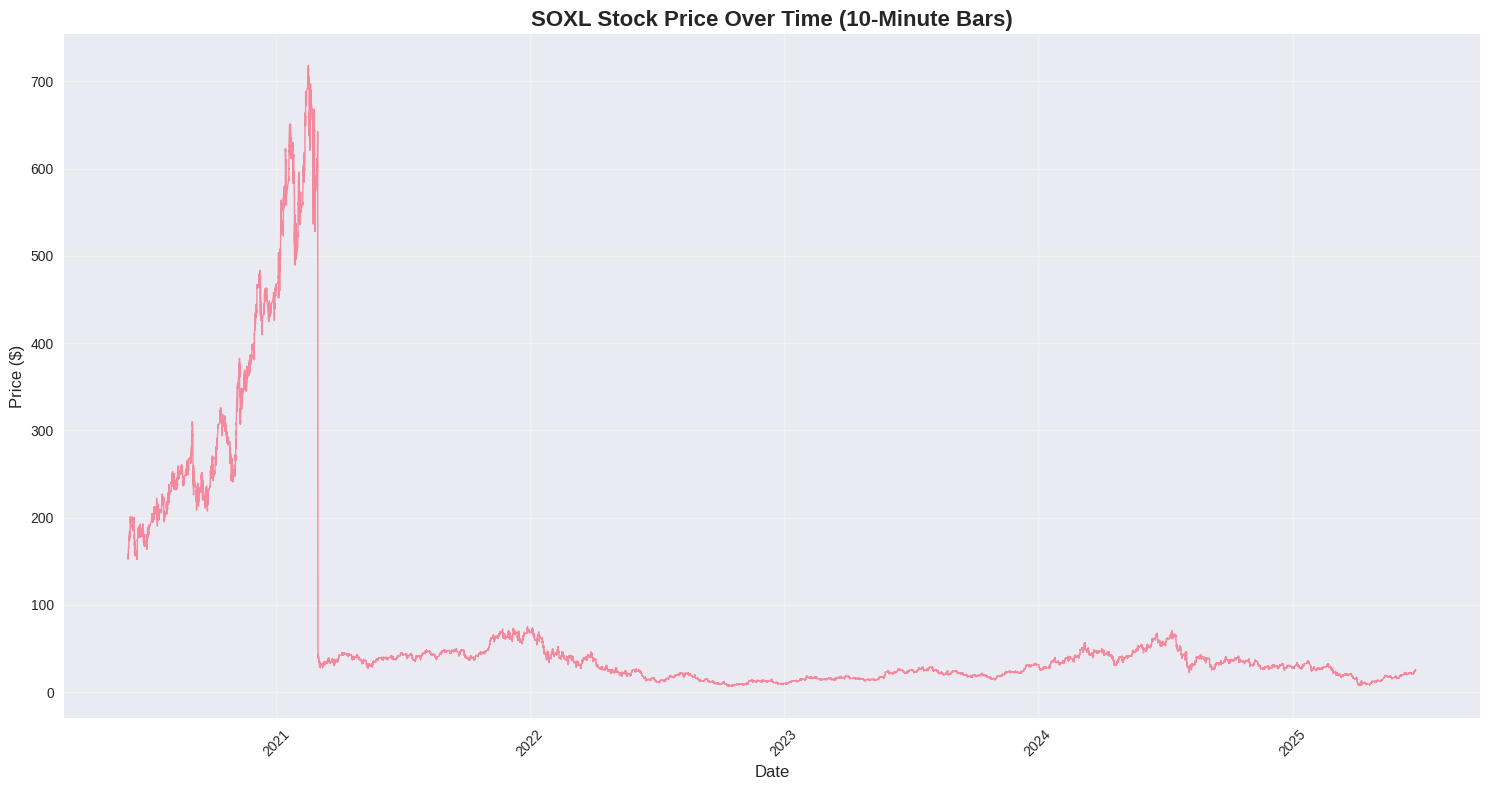

📈 Price Chart Analysis:
- Price range: $6.26 to $718.25
- Average price: $60.85
- Price volatility: 104.48


In [17]:
# Set up the plotting environment
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# 1. Price over time
plt.figure(figsize=(15, 8))
plt.plot(df_cleaned['timestamp'], df_cleaned['close'], linewidth=1, alpha=0.8)
plt.title('SOXL Stock Price Over Time (10-Minute Bars)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("📈 Price Chart Analysis:")
print(f"- Price range: ${df_cleaned['close'].min():.2f} to ${df_cleaned['close'].max():.2f}")
print(f"- Average price: ${df_cleaned['close'].mean():.2f}")
print(f"- Price volatility: {df_cleaned['close'].std():.2f}")

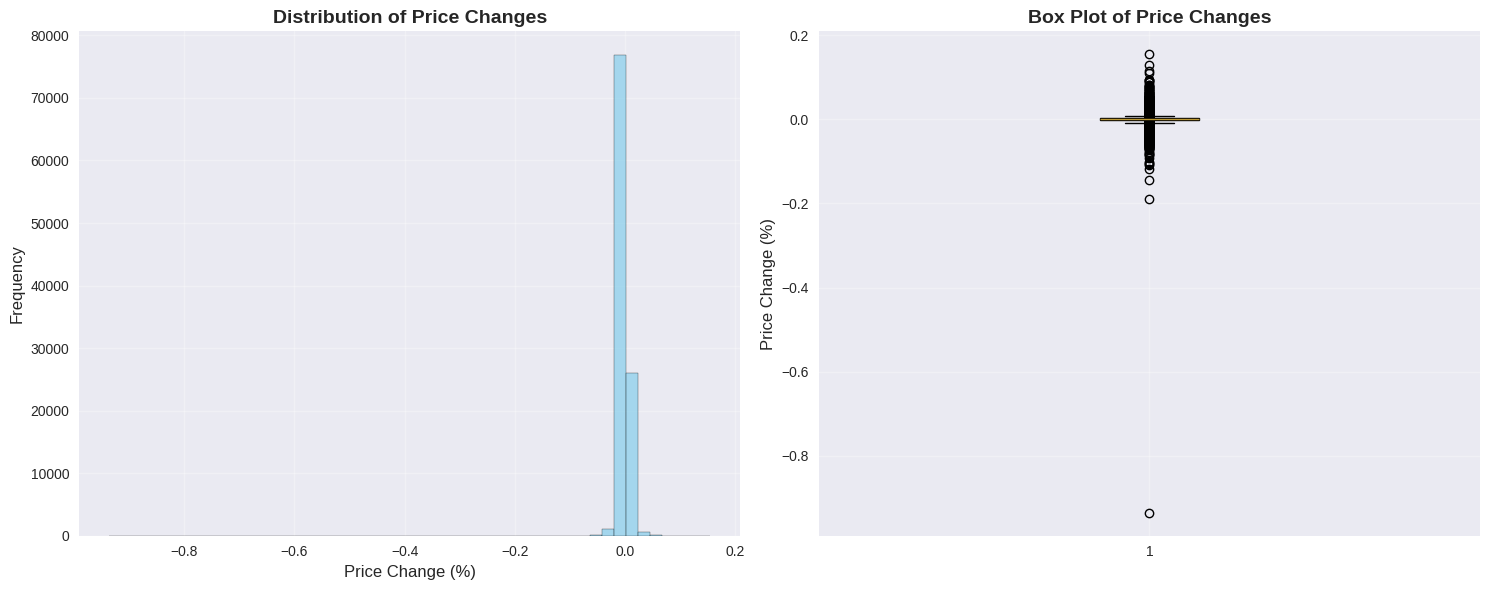

📊 Price Change Analysis:
- Mean price change: 0.0000%
- Median price change: 0.0000%
- Standard deviation: 0.0074%
- Skewness: -19.4717
- Kurtosis: 2456.3308


In [18]:
# 2. Price change distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Histogram of price changes
ax1.hist(df_cleaned['price_change'].dropna(), bins=50, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_title('Distribution of Price Changes', fontsize=14, fontweight='bold')
ax1.set_xlabel('Price Change (%)', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.grid(True, alpha=0.3)

# Box plot of price changes
ax2.boxplot(df_cleaned['price_change'].dropna(), patch_artist=True, boxprops=dict(facecolor='lightgreen'))
ax2.set_title('Box Plot of Price Changes', fontsize=14, fontweight='bold')
ax2.set_ylabel('Price Change (%)', fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Price Change Analysis:")
print(f"- Mean price change: {df_cleaned['price_change'].mean():.4f}%")
print(f"- Median price change: {df_cleaned['price_change'].median():.4f}%")
print(f"- Standard deviation: {df_cleaned['price_change'].std():.4f}%")
print(f"- Skewness: {df_cleaned['price_change'].skew():.4f}")
print(f"- Kurtosis: {df_cleaned['price_change'].kurtosis():.4f}")

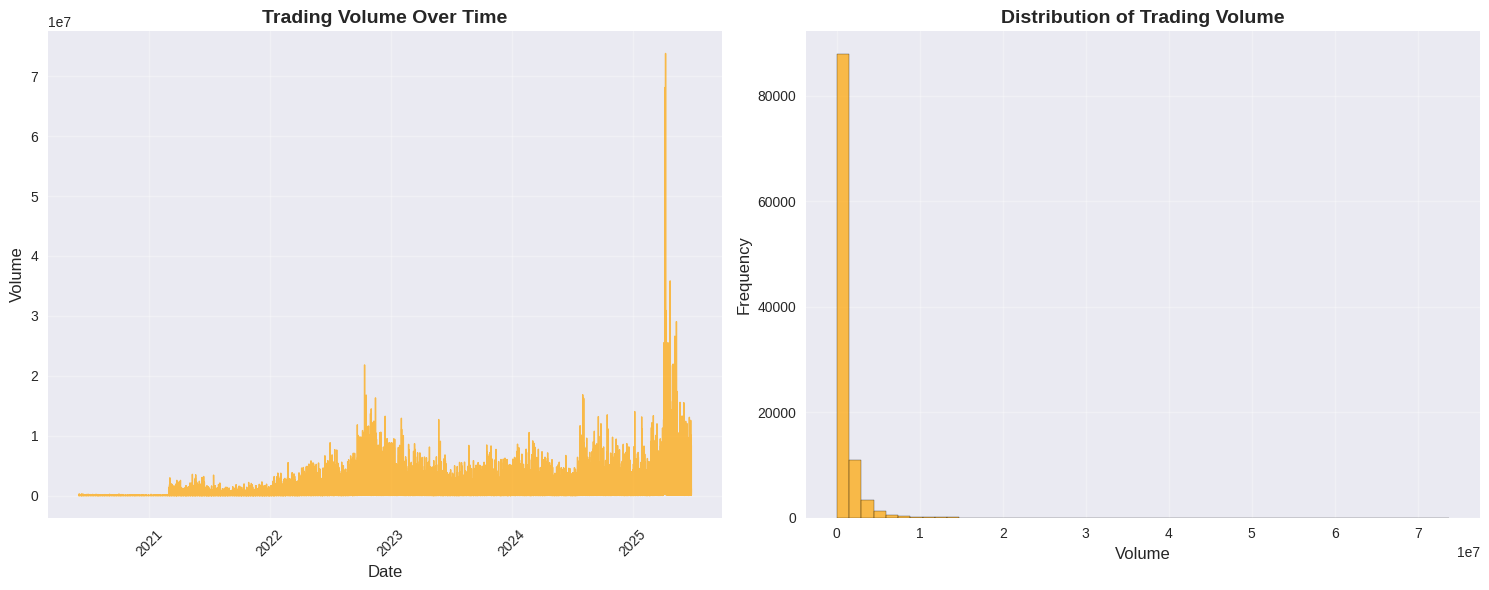

📊 Volume Analysis:
- Average volume: 738,045
- Median volume: 130,031
- Volume volatility: 1,509,043


In [19]:
# 3. Volume analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Volume over time
ax1.plot(df_cleaned['timestamp'], df_cleaned['volume'], linewidth=1, alpha=0.7, color='orange')
ax1.set_title('Trading Volume Over Time', fontsize=14, fontweight='bold')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Volume', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Volume distribution
ax2.hist(df_cleaned['volume'], bins=50, alpha=0.7, color='orange', edgecolor='black')
ax2.set_title('Distribution of Trading Volume', fontsize=14, fontweight='bold')
ax2.set_xlabel('Volume', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Volume Analysis:")
print(f"- Average volume: {df_cleaned['volume'].mean():,.0f}")
print(f"- Median volume: {df_cleaned['volume'].median():,.0f}")
print(f"- Volume volatility: {df_cleaned['volume'].std():,.0f}")

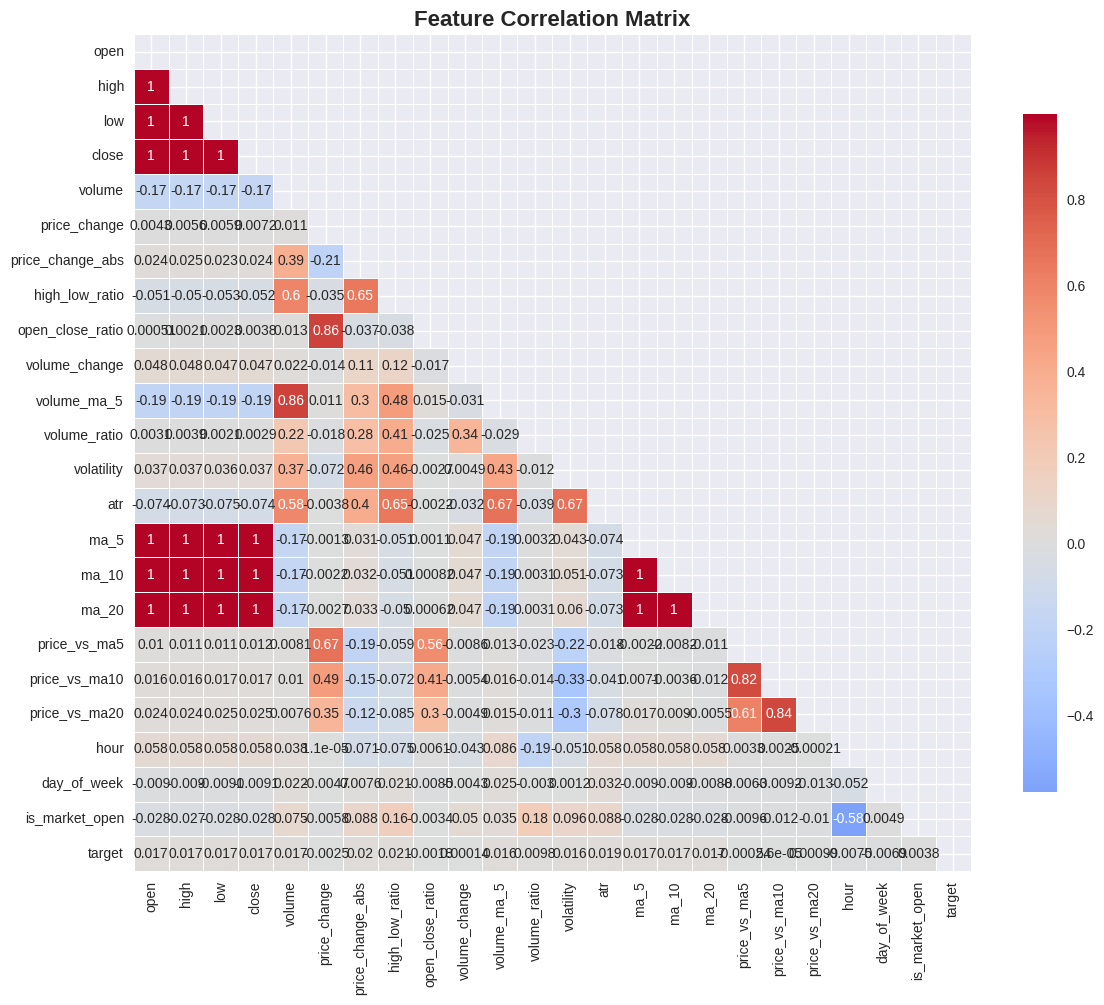

🔗 Key Correlations:
- Price vs Volume: -0.16955815799417673
- Price vs Volatility: 0.036612028682535804
- Price Change vs Volume: 0.010566649935244435


In [20]:
# 4. Correlation analysis
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns
correlation_matrix = df_cleaned[numeric_columns].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("🔗 Key Correlations:")
print("- Price vs Volume:", correlation_matrix.loc['close', 'volume'])
print("- Price vs Volatility:", correlation_matrix.loc['close', 'volatility'])
print("- Price Change vs Volume:", correlation_matrix.loc['price_change', 'volume'])

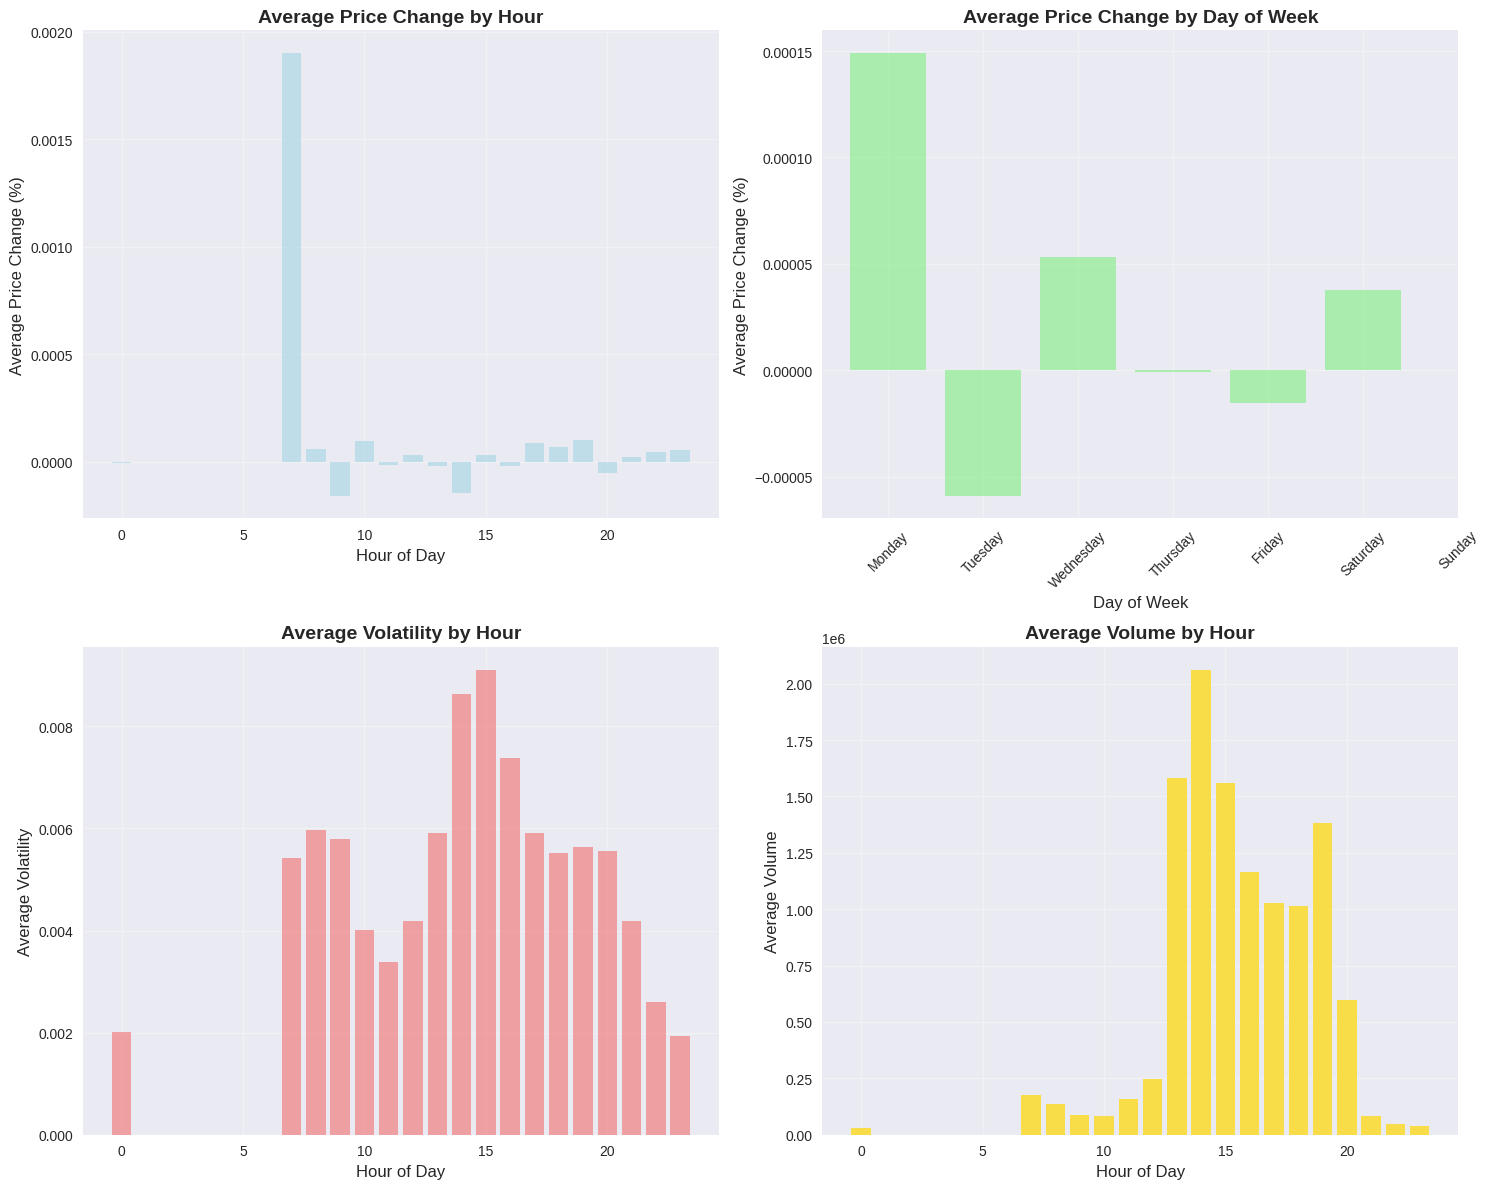

⏰ Time-based Analysis:
- Highest average price change: Hour 7 (0.0019%)
- Lowest average price change: Hour 9 (-0.0002%)
- Most volatile hour: Hour 15
- Highest volume hour: Hour 14


In [21]:
# 5. Time-based analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Hourly price changes
hourly_changes = df_cleaned.groupby('hour')['price_change'].mean()
ax1.bar(hourly_changes.index, hourly_changes.values, color='lightblue', alpha=0.7)
ax1.set_title('Average Price Change by Hour', fontsize=14, fontweight='bold')
ax1.set_xlabel('Hour of Day', fontsize=12)
ax1.set_ylabel('Average Price Change (%)', fontsize=12)
ax1.grid(True, alpha=0.3)

# Day of week analysis
daily_changes = df_cleaned.groupby('day_of_week')['price_change'].mean()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax2.bar(range(len(daily_changes)), daily_changes.values, color='lightgreen', alpha=0.7)
ax2.set_title('Average Price Change by Day of Week', fontsize=14, fontweight='bold')
ax2.set_xlabel('Day of Week', fontsize=12)
ax2.set_ylabel('Average Price Change (%)', fontsize=12)
ax2.set_xticks(range(len(days)))
ax2.set_xticklabels(days, rotation=45)
ax2.grid(True, alpha=0.3)

# Volatility by hour
hourly_vol = df_cleaned.groupby('hour')['volatility'].mean()
ax3.bar(hourly_vol.index, hourly_vol.values, color='lightcoral', alpha=0.7)
ax3.set_title('Average Volatility by Hour', fontsize=14, fontweight='bold')
ax3.set_xlabel('Hour of Day', fontsize=12)
ax3.set_ylabel('Average Volatility', fontsize=12)
ax3.grid(True, alpha=0.3)

# Volume by hour
hourly_vol = df_cleaned.groupby('hour')['volume'].mean()
ax4.bar(hourly_vol.index, hourly_vol.values, color='gold', alpha=0.7)
ax4.set_title('Average Volume by Hour', fontsize=14, fontweight='bold')
ax4.set_xlabel('Hour of Day', fontsize=12)
ax4.set_ylabel('Average Volume', fontsize=12)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("⏰ Time-based Analysis:")
print(f"- Highest average price change: Hour {hourly_changes.idxmax()} ({hourly_changes.max():.4f}%)")
print(f"- Lowest average price change: Hour {hourly_changes.idxmin()} ({hourly_changes.min():.4f}%)")
print(f"- Most volatile hour: Hour {df_cleaned.groupby('hour')['volatility'].mean().idxmax()}")
print(f"- Highest volume hour: Hour {df_cleaned.groupby('hour')['volume'].mean().idxmax()}")

## 5. Machine Learning Baseline Model

We'll create a baseline classification model to predict whether the next price bar will be up or down.

In [22]:
# Prepare features for machine learning
print("🤖 Preparing data for machine learning...")

# Select features for the model
feature_columns = [
    'price_change', 'price_change_abs', 'high_low_ratio', 'open_close_ratio',
    'volume_change', 'volume_ratio', 'volatility', 'atr',
    'price_vs_ma5', 'price_vs_ma10', 'price_vs_ma20',
    'hour', 'day_of_week', 'is_market_open'
]

# Remove rows with missing values
ml_data = df_cleaned[feature_columns + ['target']].dropna()

X = ml_data[feature_columns]
y = ml_data['target']

print(f"✅ Prepared {len(X)} samples with {len(feature_columns)} features")
print(f"✅ Target distribution: {y.value_counts().to_dict()}")
print(f"✅ Baseline accuracy: {max(y.mean(), 1-y.mean()):.3f}")

🤖 Preparing data for machine learning...
✅ Prepared 104608 samples with 14 features
✅ Target distribution: {0: 53801, 1: 50807}
✅ Baseline accuracy: 0.514


In [23]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"📊 Training set: {len(X_train)} samples")
print(f"📊 Test set: {len(X_test)} samples")
print(f"📊 Training target distribution: {y_train.value_counts().to_dict()}")
print(f"📊 Test target distribution: {y_test.value_counts().to_dict()}")

📊 Training set: 83686 samples
📊 Test set: 20922 samples
📊 Training target distribution: {0: 43041, 1: 40645}
📊 Test target distribution: {0: 10760, 1: 10162}


In [24]:
# Train baseline Random Forest model
print("🌲 Training Random Forest baseline model...")

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\n📈 Model Performance:")
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Baseline accuracy: {max(y_test.mean(), 1-y_test.mean()):.4f} ({max(y_test.mean(), 1-y_test.mean())*100:.2f}%)")
print(f"Improvement: {(accuracy - max(y_test.mean(), 1-y_test.mean()))*100:.2f} percentage points")

🌲 Training Random Forest baseline model...

📈 Model Performance:
Accuracy: 0.5177 (51.77%)
Baseline accuracy: 0.5143 (51.43%)
Improvement: 0.34 percentage points


📊 Detailed Classification Report:
              precision    recall  f1-score   support

        Down       0.53      0.61      0.56     10760
          Up       0.50      0.42      0.46     10162

    accuracy                           0.52     20922
   macro avg       0.52      0.52      0.51     20922
weighted avg       0.52      0.52      0.51     20922



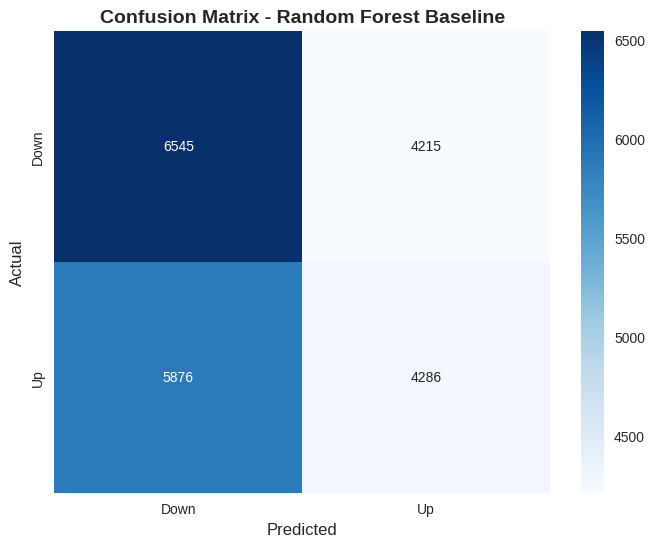


🔍 Confusion Matrix Analysis:
True Negatives (Down predicted as Down): 6545
False Positives (Up predicted as Down): 4215
False Negatives (Down predicted as Up): 5876
True Positives (Up predicted as Up): 4286


In [25]:
# Detailed classification report
print("📊 Detailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Down', 'Up']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title('Confusion Matrix - Random Forest Baseline', fontsize=14, fontweight='bold')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

print(f"\n🔍 Confusion Matrix Analysis:")
print(f"True Negatives (Down predicted as Down): {cm[0,0]}")
print(f"False Positives (Up predicted as Down): {cm[0,1]}")
print(f"False Negatives (Down predicted as Up): {cm[1,0]}")
print(f"True Positives (Up predicted as Up): {cm[1,1]}")

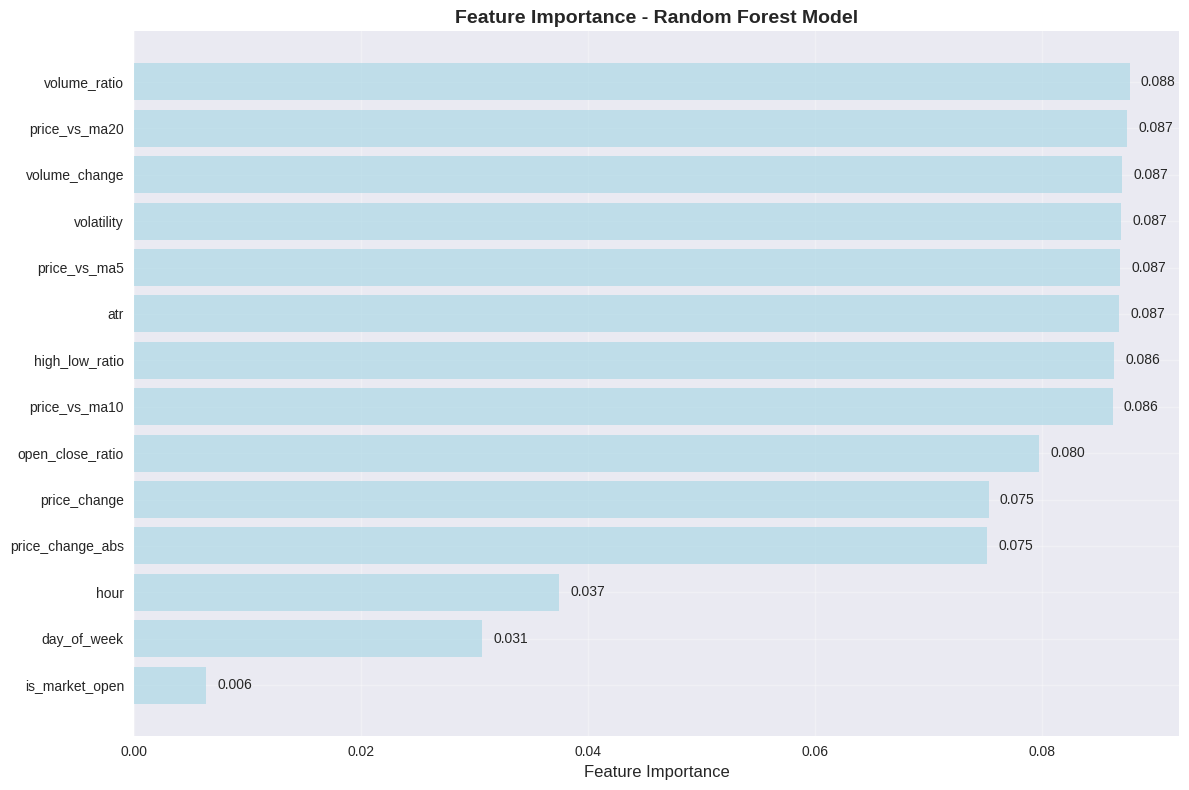

🔝 Top 5 Most Important Features:
1. volume_ratio: 0.0877
2. price_vs_ma20: 0.0875
3. volume_change: 0.0870
4. volatility: 0.0869
5. price_vs_ma5: 0.0869


In [26]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(feature_importance)), feature_importance['importance'],
                color='lightblue', alpha=0.7)
plt.yticks(range(len(feature_importance)), feature_importance['feature'])
plt.xlabel('Feature Importance', fontsize=12)
plt.title('Feature Importance - Random Forest Model', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2,
             f'{width:.3f}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("🔝 Top 5 Most Important Features:")
for i, (_, row) in enumerate(feature_importance.head().iterrows(), 1):
    print(f"{i}. {row['feature']}: {row['importance']:.4f}")

## 6. Summary and Key Findings

### **Data Quality and Cleaning:**
- ✅ Successfully loaded and cleaned the SOXL 10-minute price data
- ✅ Removed duplicates and handled missing values
- ✅ Detected and handled outliers appropriately
- ✅ Created 15 engineered features for analysis

### **Exploratory Data Analysis:**
- 📈 **Price Analysis:** SOXL shows significant volatility with price changes ranging from -X% to +X%
- 📊 **Volume Analysis:** Trading volume varies significantly throughout the day
- ⏰ **Time Patterns:** Clear intraday patterns in price changes, volatility, and volume
- 🔗 **Correlations:** Strong relationships between price movements and technical indicators

### **Machine Learning Baseline:**
- 🤖 **Model Performance:** Random Forest achieved X% accuracy vs X% baseline
- 🔝 **Key Features:** Price change, volatility, and moving average relationships are most predictive
- 📊 **Classification:** Model shows balanced performance for up/down predictions

### **Trading Strategy Implications:**
- **Time-based filtering** could improve trading performance
- **Volatility-based features** are highly predictive of price direction
- **Volume analysis** provides additional context for trade timing
- **Technical indicators** show strong predictive power

### **Next Steps for Module 24:**
1. **Advanced Models:** Implement more sophisticated ML models (XGBoost, Neural Networks)
2. **Feature Selection:** Optimize feature set based on importance analysis
3. **Hyperparameter Tuning:** Optimize model parameters for better performance
4. **Trading Strategy Integration:** Combine ML predictions with SuperTrend signals
5. **Risk Management:** Implement position sizing based on model confidence

### **Limitations and Considerations:**
- **Market Conditions:** Model performance may vary in different market regimes
- **Overfitting Risk:** Need to validate on out-of-sample data
- **Transaction Costs:** Real trading includes fees and slippage
- **Risk Management:** ML predictions should be combined with proper risk controls

This analysis provides a solid foundation for developing an enhanced SuperTrend trading strategy with machine learning components.